# Energy per residue graphs

We extracted electrostatic energy values of the best  four structures from HADDOCK output file (ene-residue.disp file provided under the HADDOCK_runs/name-of-the-job/structures/it1/water/analysis directory). Then, we calculated the average and standard deviation.


To obtain the residue energies for full-length EIF2γ:EIF2Bγ complex, we used **to_obtain_eelec_full-length** script. 
For truncated EIF2γ:EIF2Bγ complex, we used **to_obtain_eelec_truncated** script to gather residue energies. Both scripts are provided in */eif2g-eif2bg-ints/Graph/* folder. 


All obtained Eelec values are given in *ene-residue_best4.xlsx* file along with residue number and complex number for chain A and chain B, seperately. 

**!NOTE:** As we defined EIF2γ and N-ter EIF2Bγ as the same chain during the HADDOCK refinement protocol, we added 1000 to the residue numbers of EIF2γ protein. Before obtaining graphs, we changed those to original numbering. Moreover, as the C terminal of EIF2Bγ differs after 401th residue, we only considered the residues after 401th.

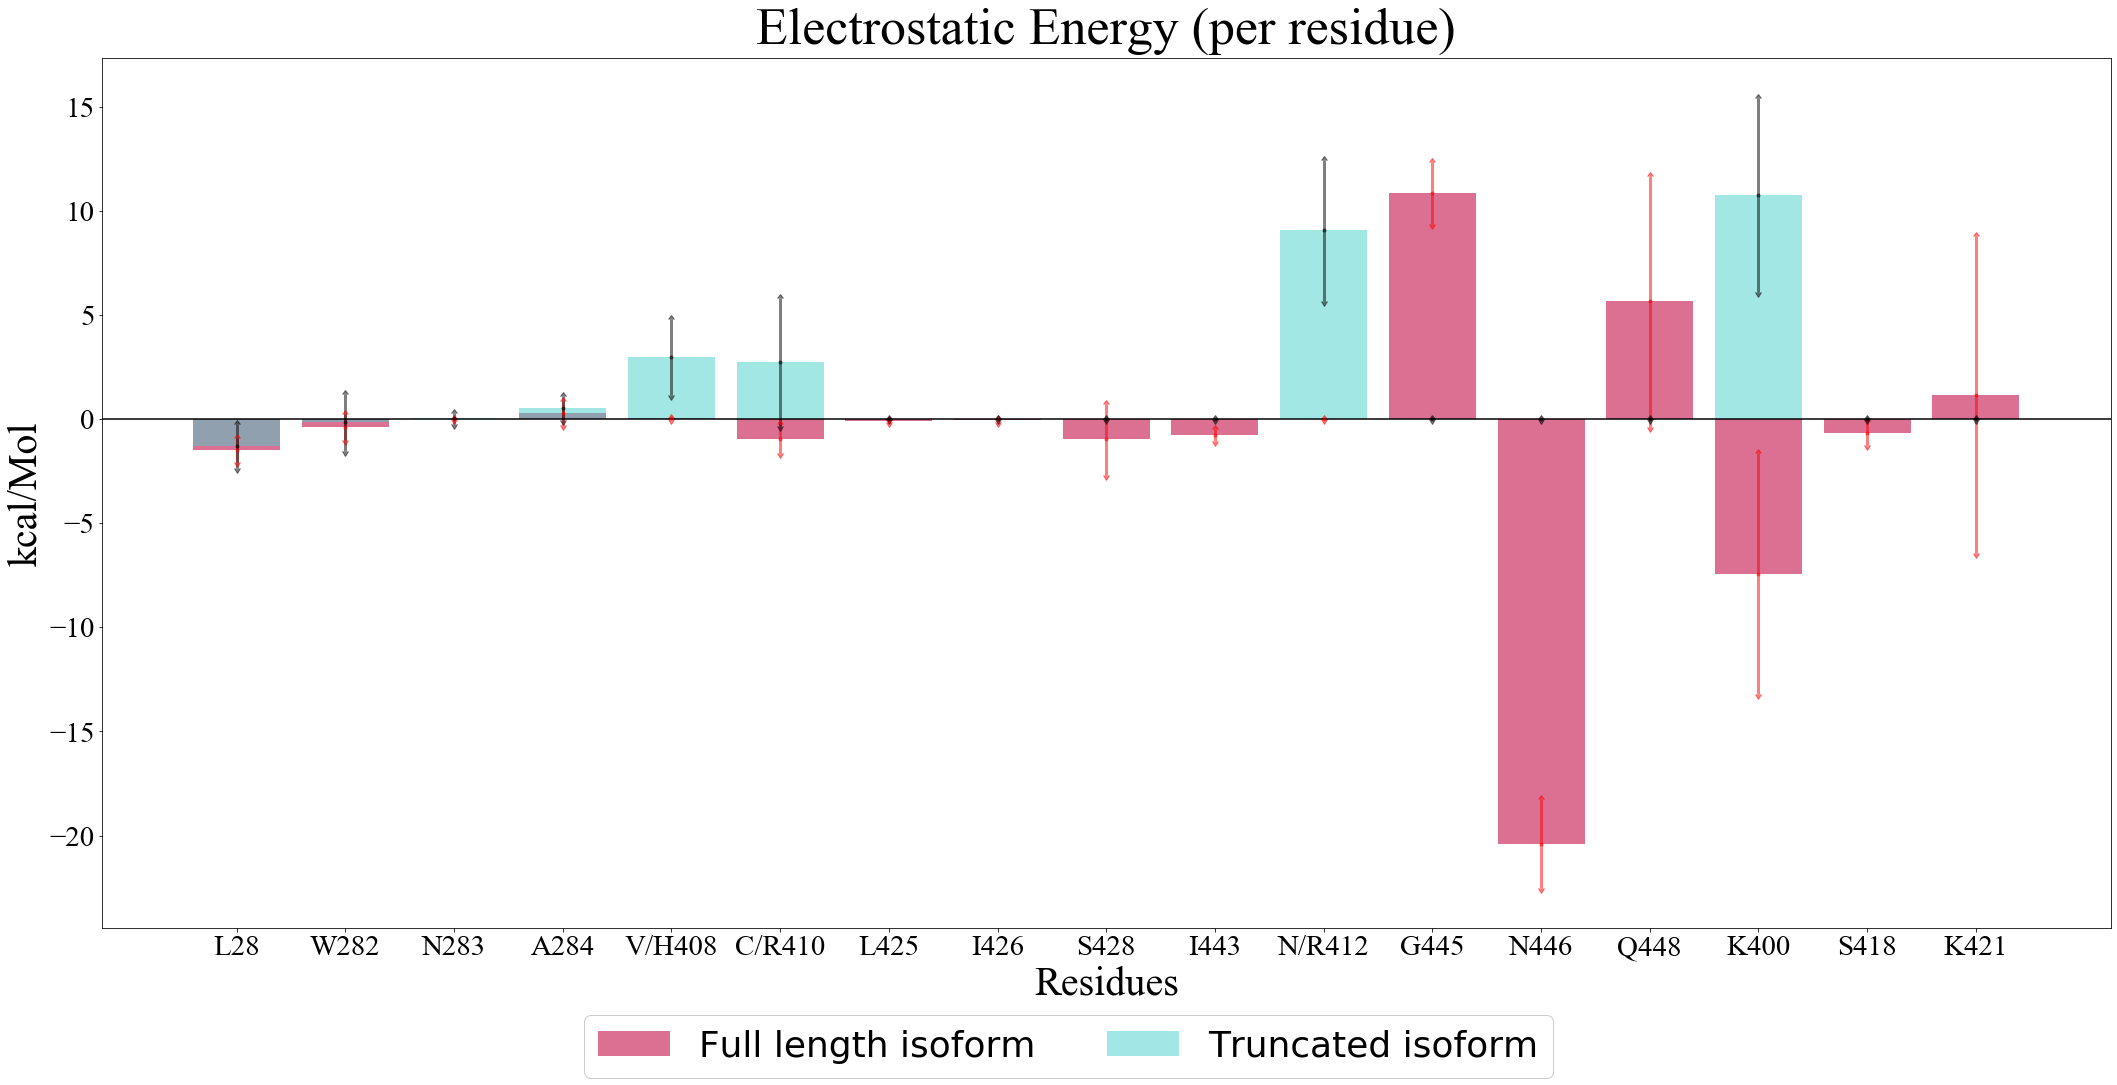

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt


fl_resi=["L28", "W282", "N283", "A284", "V/H408", "C/R410", "L425", "I426", "S428", "I443",   #Intra-EIF2Bγ
                  "N/R412", "G445", "N446", "Q448",                                           #Inter-EIF2Bγ
                  "K400", "S418", "K421"]                                                     #Inter-EIF2γ
fl_Eelec=[-1.4909425, -0.386200278, 0, 0.2902665, 0.040460603, -0.93582875, -0.10230411, -0.062547663, -0.9802685, -0.76425775,
                   0, 10.86507, -20.395075, 5.64564,
                   -7.43065,-0.653659218, 1.16873475 ]

fl_stdev=[0.583544946, 0.625368245, 0, 0.578454353, 0.018461013, 0.692766156, 0.050228116, 0.067872182, 1.710160638, 0.282593896, 
                   0, 1.491307708, 2.144954188, 6.040532252, 
                   5.791972162, 0.577845573, 7.609474783 ]
    
truncated_resi=["L28", "W282", "N283", "A284", "V/H408", "C/R410", "L425", "I426", "S428", "I443",
                  "N/R412", "G445", "N446", "Q448",
                  "K400", "S418", "K421"]
truncated_Eelec=[-1.30167775, -0.15163425, 0.039801348, 0.527372, 2.968775, 2.7323025, 0, 0, 0, 0,
                 9.0671775, 0, 0, 0,
                 10.7638675, 0, 0]

truncated_stdev=[1.068158268, 1.373348905, 0.261576594, 0.565613907, 1.82019952, 3.090739022, 0, 0, 0, 0,
                 3.376977824, 0, 0, 0,
                 4.659477045, 0, 0]

f = plt.figure(figsize=(36,16))
ax=plt.gca()

ax.tick_params(labelsize=29)
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")

ax.set_xlabel("Residues", fontname= "Times New Roman", fontsize=40)
ax.set_ylabel("kcal/Mol", fontname= "Times New Roman", fontsize=40)
ax.set_title("Electrostatic Energy (per residue)", fontname= "Times New Roman", fontsize=52, pad=15)

plt.bar(fl_resi, fl_Eelec, color="palevioletred", label="Full length isoform")
plt.errorbar(fl_resi, fl_Eelec, yerr=fl_stdev, fmt=".", color="r", alpha=0.5, linewidth=3,uplims=True, lolims=True)

plt.bar(truncated_resi, truncated_Eelec, alpha=0.5, color="mediumturquoise", label="Truncated isoform")
plt.errorbar(truncated_resi, truncated_Eelec, yerr=truncated_stdev, fmt=".", color="black", alpha=0.5, linewidth=3,uplims=True, lolims=True)

plt.axhline(y=0, color="black")

lg=ax.legend(loc='upper left',bbox_to_anchor= (0.24, -0.1), ncol=3,borderaxespad=0, framealpha=6, fontsize=36)

plt.savefig('Eelec', dpi=400, bbox_extra_artists=(lg,), bbox_inches='tight')